In [1]:
!pip install TA-Lib

  Using cached TA-Lib-0.4.28.tar.gz (357 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [74 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-12.6-x86_64-cpython-310
      creating build/lib.macosx-12.6-x86_64-cpython-310/talib
      copying talib/abstract.py -> build/lib.macosx-12.6-x86_64-cpython-310/talib
      copying talib/deprecated.py -> build/lib.macosx-12.6-x86_64-cpython-310/talib
      copying talib/__init__.py -> build/lib.macosx-12.6-x86_64-cpython-310/talib
      copying talib/stream.py -> build/lib.macosx-12.6-x86_64-cpython-310/talib
      running build_ext
      building 'talib._ta_lib' extension
      creating bui

In [ ]:
!pip3 install TA-Lib

In [3]:
import talib as ta
import yfinance as yf
import mplfinance as mpf
import pandas as pd

In [4]:
df = yf.download('3760.T')

[*********************100%%**********************]  1 of 1 completed


In [5]:
import datetime as dt
start = dt.datetime.now() - dt.timedelta(90)
end = dt.datetime.now()

In [7]:
#cdf = yf.download('3760.T',start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#ボリンジャーバンドを作成する（たりぶだと標準偏差を１関数で簡単に計算できる）,終値と20日移動平均線を用いて計算させる
#平均線を作成するが、２０日平均線は前回で作成済のため＿で省略している。
#1シグマ
df["upper1"], _, df["lower1"] = ta.BBANDS(df['Close'],timeperiod=20, nbdevup=1, nbdevdn=1, matype=ta.MA_Type.SMA)
#2シグマ
df["upper2"], _, df["lower2"] = ta.BBANDS(df['Close'],timeperiod=20, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)
df

In [21]:
#モメンタム
df["MON"] = ta.MOM(df["Close"], timeperiod=12)
df["MON_0"] = 0
df

,Open,High,Low,Close,Adj Close,Volume,upper1,lower1,upper2,lower2,MON,MON_0,ma5,ma20,ma60,ma200,ATR20,ATR20_U,ATR20_L
Date,,,,,,,,,,,,,,,,,,,
2004-12-24,6710.0,6710.0,6710.0,6710.0,6710.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-27,7500.0,7590.0,5720.0,5900.0,5900.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-28,6030.0,6840.0,5610.0,6800.0,6800.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-29,6900.0,7800.0,6740.0,7800.0,7800.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-30,8100.0,8800.0,7790.0,8800.0,8800.0,0,NaN,NaN,NaN,NaN,NaN,0,7202.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13,1731.0,1731.0,1669.0,1687.0,1687.0,78100,1782.209771,1659.390229,1843.619542,1597.980458,-33.0,0,1716.4,1720.80,1516.033333,1714.080,72.815336,1830.023004,1611.576996
2024-03-14,1696.0,1725.0,1692.0,1724.0,1724.0,39400,1769.141854,1693.958146,1806.733708,1656.366292,-71.0,0,1710.8,1731.55,1526.583333,1712.125,71.074569,1838.161854,1624.938146
2024-03-15,1710.0,1716.0,1684.0,1708.0,1708.0,62300,1767.691741,1701.108259,1800.983481,1667.816519,-82.0,0,1708.4,1734.40,1536.783333,1710.140,69.520841,1838.681261,1630.118739


In [22]:
#移動平均線
df["ma5"] = ta.SMA(df['Close'], 5)
df["ma20"] = ta.SMA(df['Close'], 20)
df["ma60"] = ta.SMA(df['Close'], 60)
df["ma200"] = ta.SMA(df['Close'], 200)

#ケルトナー
df["ATR20"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=20)

df["ATR20_U"] = df["ma20"] + df["ATR20"]*1.5
df["ATR20_L"] = df["ma20"] - df["ATR20"]*1.5
df

,Open,High,Low,Close,Adj Close,Volume,upper1,lower1,upper2,lower2,MON,MON_0,ma5,ma20,ma60,ma200,ATR20,ATR20_U,ATR20_L
Date,,,,,,,,,,,,,,,,,,,
2004-12-24,6710.0,6710.0,6710.0,6710.0,6710.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-27,7500.0,7590.0,5720.0,5900.0,5900.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-28,6030.0,6840.0,5610.0,6800.0,6800.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-29,6900.0,7800.0,6740.0,7800.0,7800.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-30,8100.0,8800.0,7790.0,8800.0,8800.0,0,NaN,NaN,NaN,NaN,NaN,0,7202.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13,1731.0,1731.0,1669.0,1687.0,1687.0,78100,1782.209771,1659.390229,1843.619542,1597.980458,-33.0,0,1716.4,1720.80,1516.033333,1714.080,72.815336,1830.023004,1611.576996
2024-03-14,1696.0,1725.0,1692.0,1724.0,1724.0,39400,1769.141854,1693.958146,1806.733708,1656.366292,-71.0,0,1710.8,1731.55,1526.583333,1712.125,71.074569,1838.161854,1624.938146
2024-03-15,1710.0,1716.0,1684.0,1708.0,1708.0,62300,1767.691741,1701.108259,1800.983481,1667.816519,-82.0,0,1708.4,1734.40,1536.783333,1710.140,69.520841,1838.681261,1630.118739


/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/1934943371.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


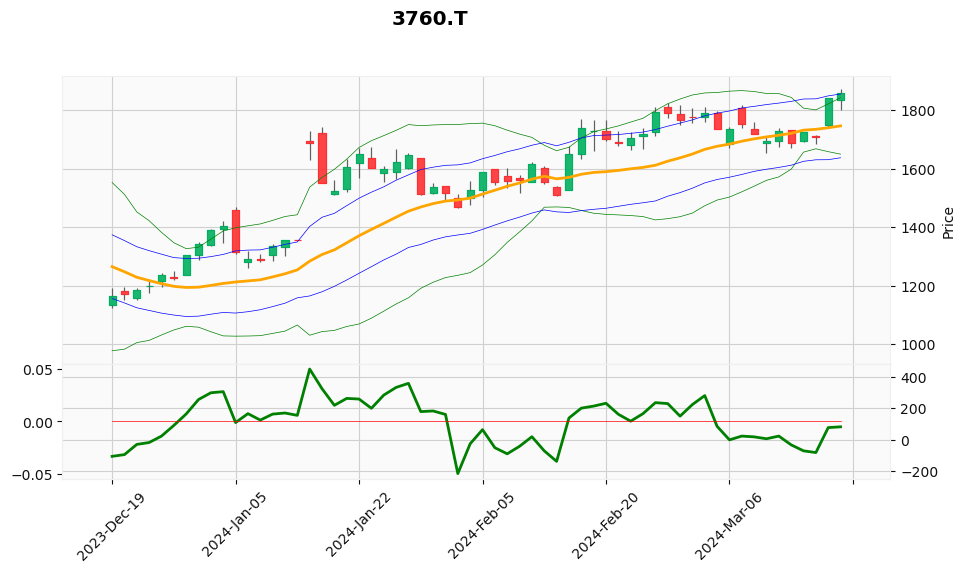

In [25]:
#BB,移動平均線、モメンタムをグラフに追加する
days = 60
cdf = df.tail(days)
apd = [mpf.make_addplot(cdf["ma20"], color="orange", width=2),
      #mpf.make_addplot(cdf["upper1"], color="blue", width=0.5), 
      #mpf.make_addplot(cdf["lower1"], color="blue", width=0.5),
      mpf.make_addplot(cdf["upper2"], color="green", width=0.5),
      mpf.make_addplot(cdf["lower2"], color="green", width=0.5),
      mpf.make_addplot(cdf["ATR20_U"], color="blue", width=0.5),
      mpf.make_addplot(cdf["ATR20_L"], color="blue", width=0.5),
      mpf.make_addplot(cdf["MON"], panel=1, color="green", width=2),
      mpf.make_addplot(cdf["MON_0"], panel=1, color="red", width=0.5),
      ]

#グラフの設定（サイズ、様式など）
fig, axes = mpf.plot(cdf, title='3760.T', type="candle", figratio=(2,1), addplot=apd, returnfig=True, volume=False, style='yahoo')

fig.show()


In [29]:
def get_spz_data(code):
    df = yf.download("{}.T".format(code))
    df["ma20"] = ta.SMA(df['Close'], 20)
    df["ATR20"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=20)
    df["ATR20_U"] = df["ma20"] + df["ATR20"]*1.5
    df["ATR20_L"] = df["ma20"] - df["ATR20"]*1.5
    df["upper2"], _, df["lower2"] = ta.BBANDS(df['Close'],timeperiod=20, nbdevup=2, nbdevdn=2, matype=ta.MA_Type.SMA)
    df["MON"] = ta.MOM(df["Close"], timeperiod=12)
    df["MON_0"] = 0 
    return df

In [30]:
adf = get_spz_data('2001')
adf.tail(20)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,ma20,ATR20,ATR20_U,ATR20_L,upper2,lower2,MON,MON_0
Date,,,,,,,,,,,,,,
2024-02-20,2400.0,2406.0,2364.0,2375.0,2375.0,247400,2274.40,45.525381,2342.688071,2206.111929,2373.760757,2175.039243,103.0,0
2024-02-21,2378.0,2385.0,2364.0,2375.0,2375.0,148600,2280.95,44.299112,2347.398668,2214.501332,2388.375276,2173.524724,126.0,0
2024-02-22,2385.0,2397.0,2376.0,2395.0,2395.0,196500,2290.30,43.184156,2355.076234,2225.523766,2403.116843,2177.483157,123.0,0
2024-02-26,2400.0,2416.0,2368.0,2373.0,2373.0,181300,2297.50,43.424948,2362.637423,2232.362577,2412.115008,2182.884992,71.0,0
2024-02-27,2367.0,2382.0,2345.0,2359.0,2359.0,140300,2304.50,43.103701,2369.155552,2239.844448,2416.144973,2192.855027,65.0,0
2024-02-28,2367.0,2382.0,2355.0,2359.0,2359.0,119300,2310.10,42.298516,2373.547774,2246.652226,2420.878879,2199.321121,102.0,0
2024-02-29,2375.0,2386.0,2363.0,2378.0,2378.0,194200,2317.35,41.533590,2379.650385,2255.049615,2425.954374,2208.745626,143.0,0
2024-03-01,2381.0,2387.0,2357.0,2370.0,2370.0,110200,2322.55,40.956911,2383.985366,2261.114634,2430.780264,2214.319736,84.0,0
2024-03-04,2373.0,2384.0,2334.0,2336.0,2336.0,178900,2325.75,41.409065,2387.863598,2263.636402,2431.570367,2219.929633,90.0,0


In [42]:
def write_chart(df,title,days=60):
    df = df.tail(days)
    savedir = "./chartdata/"
    outfile = savedir + title 
    
    apd = [mpf.make_addplot(df["ma20"], color="orange", width=2),
      mpf.make_addplot(df["upper2"], color="green", width=0.5),
      mpf.make_addplot(df["lower2"], color="green", width=0.5),
      mpf.make_addplot(df["ATR20_U"], color="blue", width=0.5),
      mpf.make_addplot(df["ATR20_L"], color="blue", width=0.5),
      mpf.make_addplot(df["MON"], panel=1, color="green", width=2),
      mpf.make_addplot(df["MON_0"], panel=1, color="red", width=0.5),
      ]
    fig, axes = mpf.plot(df, title=title, type="candle", figratio=(2,1), addplot=apd, returnfig=True, volume=False, style='yahoo')
    fig.show()
    fig.savefig(outfile)
    #savefig=dict(fname=outfile, dpi=100)
    
#リターンはいらない、値を返す関数じゃないから

/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


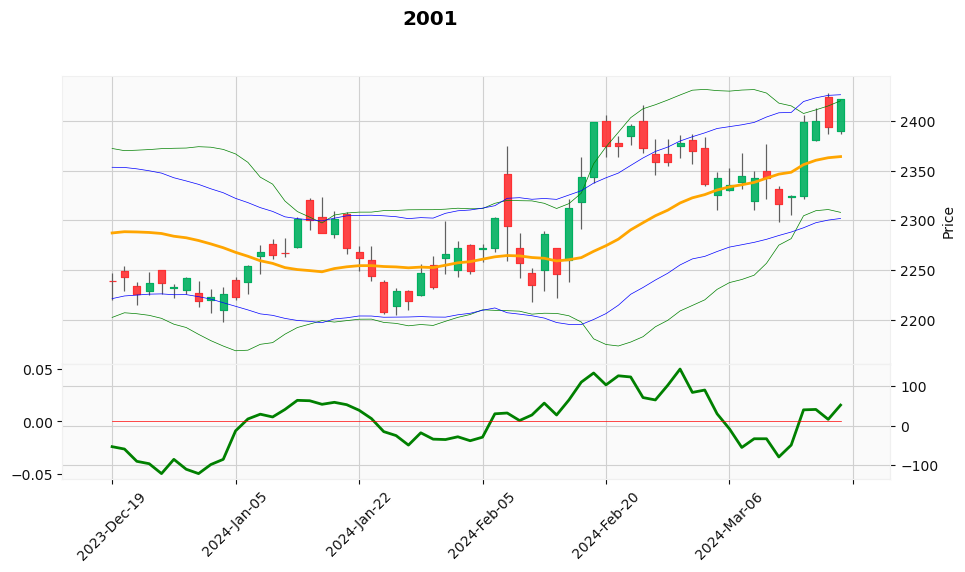

In [43]:
write_chart(adf,'2001')

In [61]:
#モメンタムが０付近かどうか
#モメンタムの値だけ取りたいので、ヴァリュー０を入れる（入れないと日付など不要な情報も含まれてしまう）
def mom_check2(df, upper=1, lower=1):
    cdf = df.tail(1)
    MON = cdf['MON'].values[0]
    if (lower < MON) & (MON < upper):
        return True
    else:
        return False
    

In [69]:
#モメンタムが０付近かどうか
#モメンタムの値だけ取りたいので、ヴァリュー０を入れる（入れないと日付など不要な情報も含まれてしまう）
def mom_check(df, upper=1, lower=-1):
    cdf = df.tail(1)
    MON = cdf['MON'].values[0]
    return (lower < MON) & (MON < upper)

In [70]:
mom_check(df)

False

In [57]:
#df.tail(1)
#df
df['MON'].tail(1)[0]

82.0

In [50]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'upper1',
       'lower1', 'upper2', 'lower2', 'MON', 'MON_0', 'ma5', 'ma20', 'ma60',
       'ma200', 'ATR20', 'ATR20_U', 'ATR20_L'],
      dtype='object')

In [71]:
#BBがケルトナー内に入っているかどうか
#モメンタムの値だけ取りたいので、ヴァリュー０を入れる（入れないと日付など不要な情報も含まれてしまう）
def bb_check(df):
    cdf = df.tail(1)
    BBU2 = cdf['upper2'].values[0]
    BBL2 = cdf['lower2'].values[0]
    ATRU = cdf['ATR20_U'].values[0]
    ATRL = cdf['ATR20_L'].values[0]
    return (ATRL < BBL2 ) & (BBU2 < ATRU)

In [72]:
bb_check(df)

True

In [73]:
dfr = pd.read_csv('営業利益増額.csv')

In [74]:
dfr.head(5)

,コード
0,3760
1,7208
2,1375
3,9170
4,6335


In [75]:
dfr.dtypes
#コードを数字から文字扱いに変更したい

コード    int64
dtype: object

In [78]:
dfr = dfr['コード'].astype(str)
dfr.dtypes

dtype('O')

In [80]:
for code in dfr:
    #print(code)
    df = get_spz_data(code)
    if bb_check(df) & mom_check(df, upper=20, lower=-20):
        write_chart(df,code,days=60)

print('書き出し終了')
#このままだとエラーが出て途中で止まってしまうので、例外処理をしたい

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['9170.T']: Exception('%ticker%: No timezone found, symbol may be delisted')


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
for code in dfr:
    #print(code)
    try:
        df = get_spz_data(code)
        if bb_check(df) & mom_check(df, upper=20, lower=-20):
            write_chart(df,code,days=60)
    except IndexError as et:
        print(code)
        print(et)
        continue


print('書き出し終了')

In [82]:
import tqdm

In [83]:
range(len(dfr))

range(0, 60)

[*********************100%%**********************]  1 of 1 completed00<?, ?it/s]
[*********************100%%**********************]  1 of 1 completed,  1.30it/s]
[*********************100%%**********************]  1 of 1 completed,  1.88it/s]
[*********************100%%**********************]  1 of 1 completed,  2.08it/s]

1 Failed download:
['9170.T']: Exception('%ticker%: No timezone found, symbol may be delisted')


9170
index 0 is out of bounds for axis 0 with size 0


[*********************100%%**********************]  1 of 1 completed
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  1 of 1 completed,  1.82it/s]
[*********************100%%**********************]  1 of 1 completed,  1.68it/s]
[*********************100%%**********************]  1 of 1 completed,  1.45it/s]
[*********************100%%**********************]  1 of 1 completed,  1.74it/s]
[*********************100%%**********************]  1 of 1 completed,  1.58it/s]
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  

5847
index 0 is out of bounds for axis 0 with size 0


[*********************100%%**********************]  1 of 1 completed
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  1 of 1 completed,  2.19it/s]
[*********************100%%**********************]  1 of 1 completed,  1.78it/s]
[*********************100%%**********************]  1 of 1 completed,  1.30it/s]
[*********************100%%**********************]  1 of 1 completed,  1.37it/s]
[*********************100%%**********************]  1 of 1 completed,  1.48it/s]
[*********************100%%**********************]  1 of 1 completed,  1.73it/s]
[*********************100%%**********************]  1 of 1 completed,  1.87it/s]
[*********************100%%**********************]  1 of 1 completed,  1.85it/s]
[*********************100%%*******************

3515
index 0 is out of bounds for axis 0 with size 0


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed,  2.13it/s]
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  1 of 1 completed,  1.70it/s]
[*********************100%%**********************]  1 of 1 completed,  1.91it/s]
[*********************100%%**********************]  1 of 1 completed,  1.57it/s]
[*********************100%%**********************]  1 of 1 completed,  1.48it/s]

1 Failed download:
['9705.T']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['8554.T']: Exception('%ticker%: No timezone found, symbol may be delisted')


9705
index 0 is out of bounds for axis 0 with size 0
8554
index 0 is out of bounds for axis 0 with size 0


[*********************100%%**********************]  1 of 1 completed
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  1 of 1 completed,  1.94it/s]
[*********************100%%**********************]  1 of 1 completed,  1.95it/s]
[*********************100%%**********************]  1 of 1 completed,  1.87it/s]
[*********************100%%**********************]  1 of 1 completed,  1.95it/s]
/var/folders/xy/v4k38k8121n12zj_qtpv67_m0000gn/T/ipykernel_17638/2786959678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
[*********************100%%**********************]  1 of 1 completed,  1.77it/s]
[*********************100%%**********************]  

6606
index 0 is out of bounds for axis 0 with size 0


[*********************100%%**********************]  1 of 1 completed
100%|███████████████████████████████████████████| 60/60 [00:36<00:00,  1.64it/s]


書き出し終了


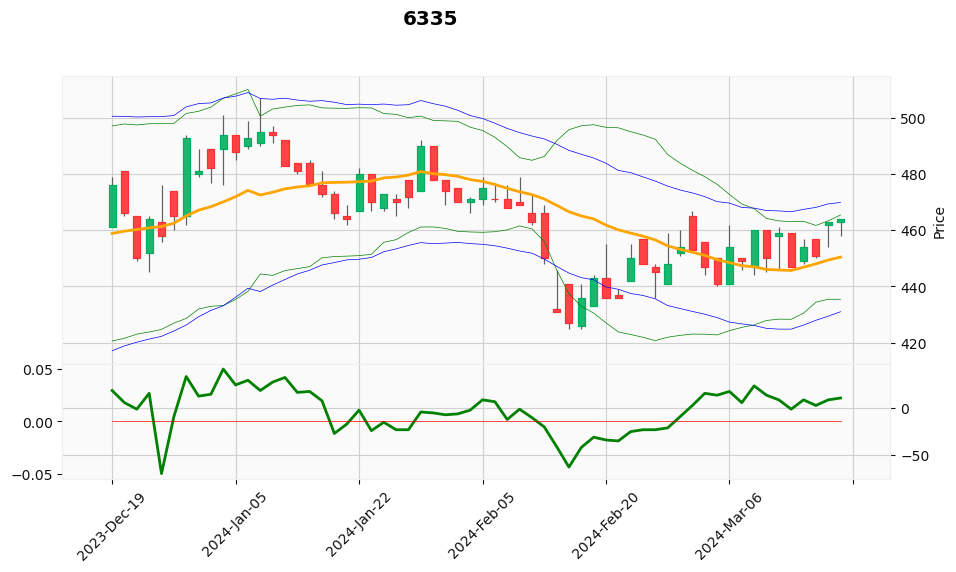

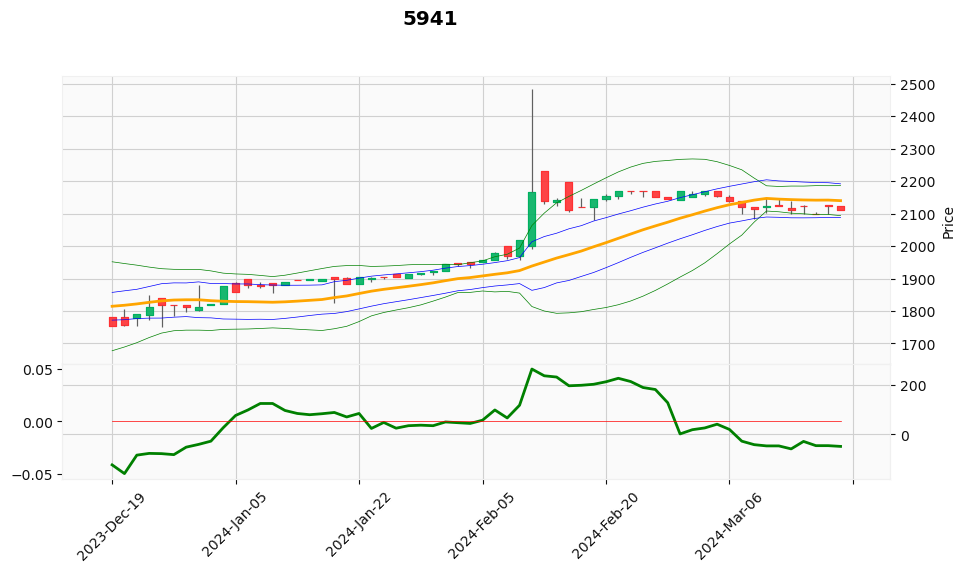

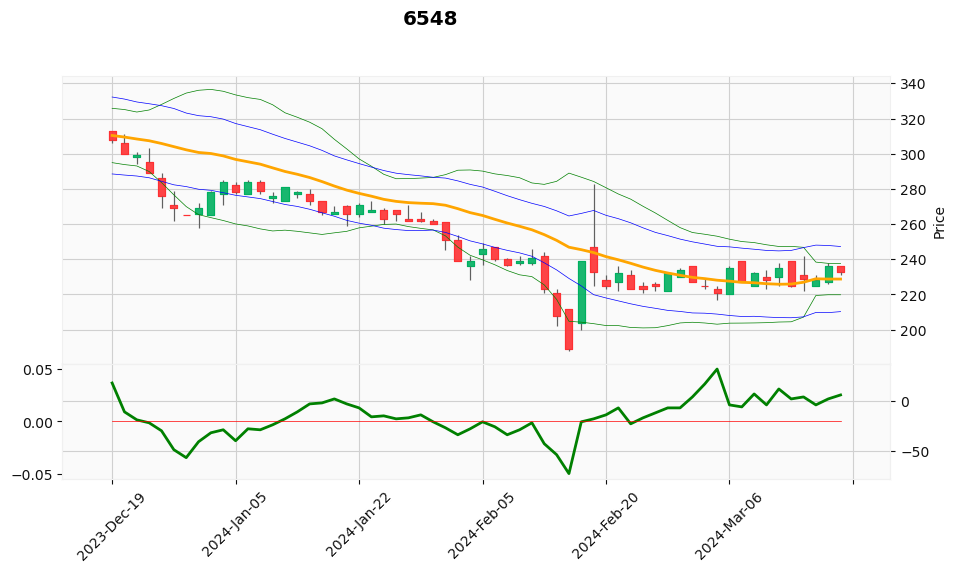

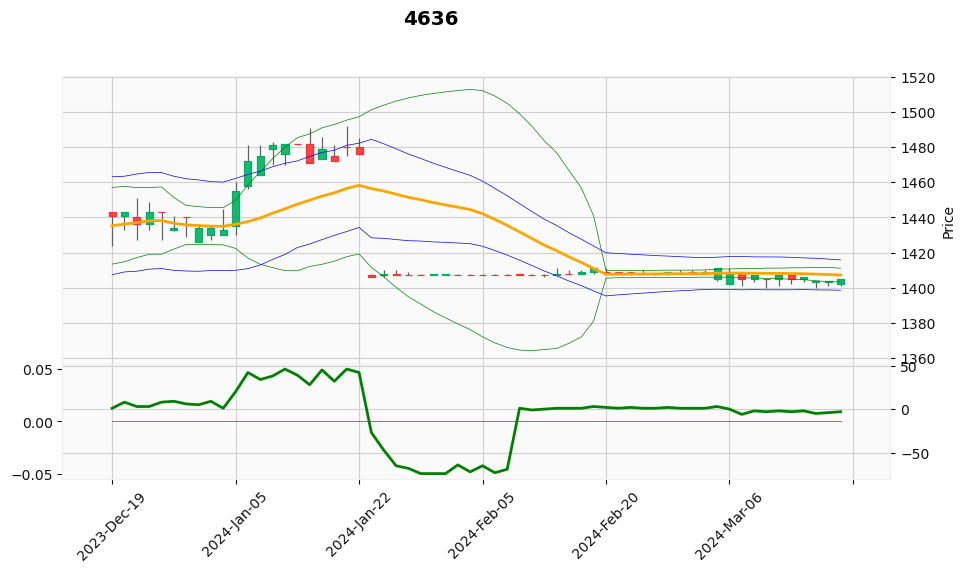

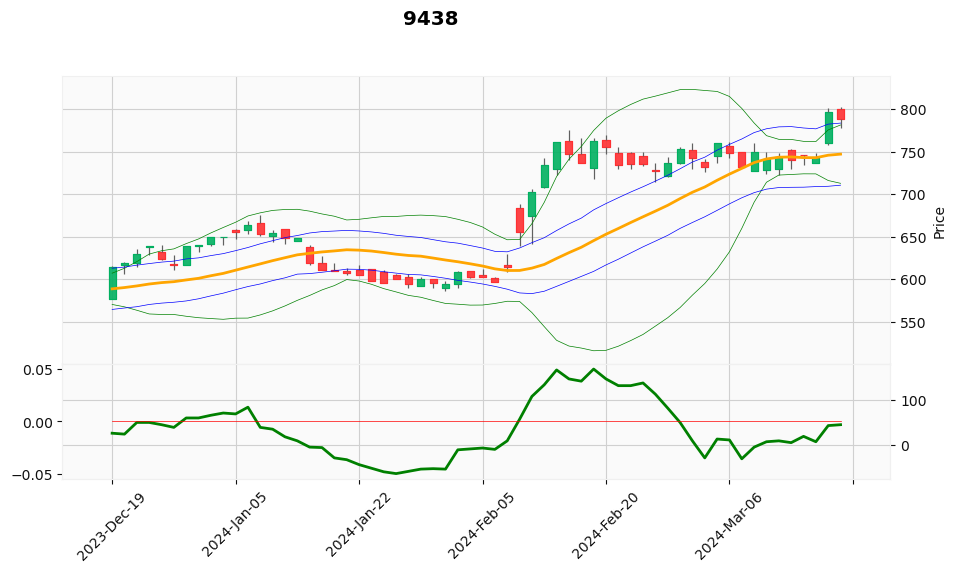

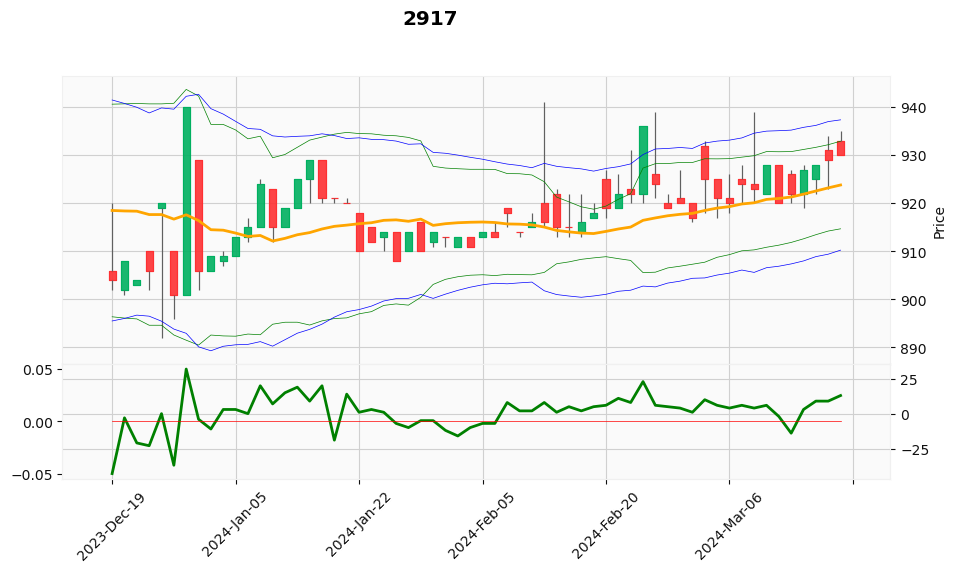

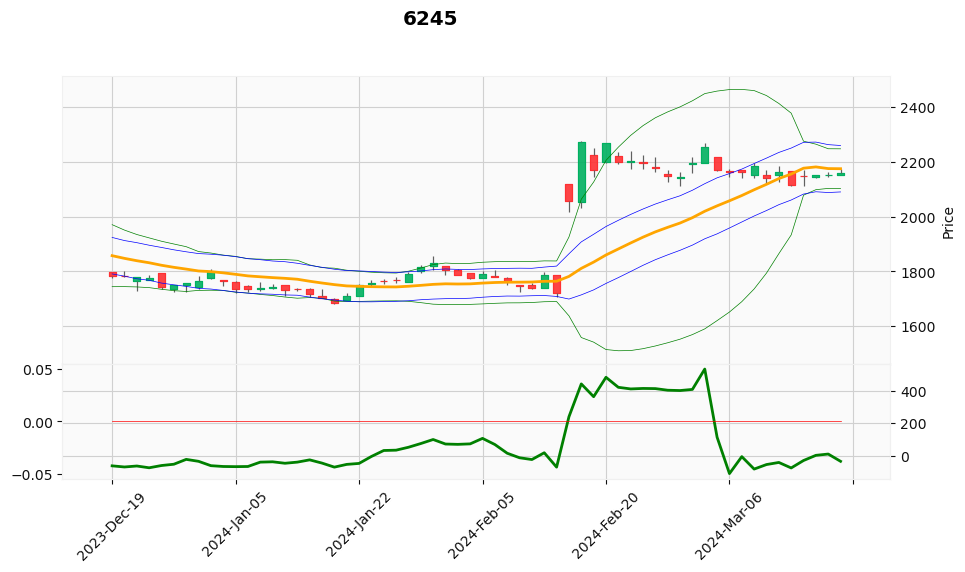

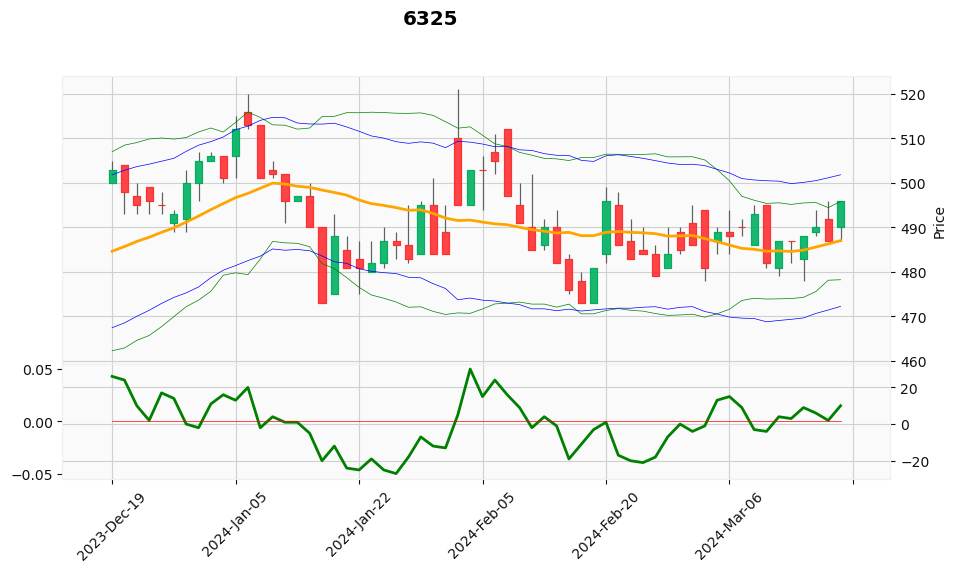

In [86]:
#進捗状況がわかるように設定を追加
for i in tqdm.tqdm(range(len(dfr))):
    code = dfr[i]
    #print(code)
    try:
        df = get_spz_data(code)
        if bb_check(df) & mom_check(df, upper=50, lower=-50):
            write_chart(df,code,days=60)
    except IndexError as et:
        print(code)
        print(et)
        continue


print('書き出し終了')